# Lead Scoring Case Study

### Problem Statement:

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.
 
### Objectives of case study:
Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [1]:
# import warnings

import warnings 
warnings.filterwarnings("ignore")

In [2]:
#import necessary libraries

import pandas as pd, numpy as np

# libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

# for statistical analysis
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
# display maximum number of rows and columns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Data Understanding

In [4]:
# load data
lead_score = pd.read_csv("leads.csv")

In [5]:
# Check the head of the dataset
lead_score.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened


In [6]:
lead_score.shape

(9240, 37)

In [7]:
# concise summary of the DataFrame's structure
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
# getting the descriptive statistics of all the numerical columns
lead_score.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


-  Our target variable is the 'Converted' column, which has binary values, the mean value for this column is 0.38, it indicates approx 38% conversion rate.

In [9]:
# check if any duplicates in our DataFrame to ensures data quality and integrity
lead_score.duplicated().sum()

0

# Data Pre-processing

### Data Cleaning

In [10]:
# display detailed information about the DataFrame
lead_score.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

-  In our Dataset we have in total 9240 entries and 37 columns, and some columns have missing values in them.
-  Prospect ID and Lead Number are unique identifiers meaning they don't have any mathematical significance, and are only used for identification. 

In [11]:
#convert the 'Lead Number' column to object type.
lead_score['Lead Number'] = lead_score['Lead Number'].astype('object')

In [12]:
# Check value counts for all the categorical columns

# make list of columns to exclude from value_counts
cols_not_to_include = ['Prospect ID', 'Lead Number']  # since they are all unique values  

# print value_counts for columns having object dtype
for col in lead_score.columns:
    if col not in cols_not_to_include and lead_score[col].dtype == 'object':
        print(lead_score[col].value_counts())

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64
Do Not Email
No     8506
Yes     734
Name: count, dtype: int64
Do Not Call
No     9238
Yes       2
Name: count, dtype: int64
Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark

-  Both Lead Number and Prospect ID uniquely identify leads or prospects, these columns are not relevant for our model prediction since we cannot compute on them, so we drop them.
-  There are few categorical values that have 'select' as a level which indicates that a user might not have chosen any option and thus we can treat this as missing value or missing data and we can replace this with NaN.

In [13]:
# Drop the 'Prospect ID' column as we don't want this column for computations
lead_score.drop(columns=['Prospect ID'], inplace=True)

In [14]:
# Drop the 'Lead Number' column as we don't want this column for computations
lead_score.drop(columns=['Lead Number'], inplace=True)

In [15]:
# replacing the 'select' level present in few of the categorical variables with nan
lead_score = lead_score.replace('Select' , np.nan) 

In [16]:
# Calculating the percentage of missing values
missing_value_percentage = round((lead_score.isnull().sum() / len(lead_score)) * 100, 2)
missing_value_percentage.sort_values(ascending = False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Get updates on DM Content                         0.00
Update me 

-  There are many columns, that have high missing values even above 40% which would be more than 3500 entries of the 9240 entries we have in our dataset, imputing them would create bias and may affect the models predictive power, so we drop them.

In [17]:
# Filter the columns to drop those with missing values above 40%
columns_to_drop = missing_value_percentage[missing_value_percentage > 40].index  # get names of the columns

# view the columns to drop
columns_to_drop

Index(['How did you hear about X Education', 'Lead Quality', 'Lead Profile',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')

In [18]:
# dropping the columns having missing values > 40%
lead_score.drop(columns = columns_to_drop , inplace=True)

In [19]:
# check missing percentage again
round((lead_score.isnull().sum() / len(lead_score)) * 100, 2).sort_values(ascending = False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
Update me on Supply Chain Content                 0.00
Lead Origin                                       0.00
Digital Advertisement                             0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Magazine  

-  There are still few columns with higher missing values, such as 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Tags', 'City'; let us analysis them and understand the distribution of different values in these columns.

In [20]:
# Check the value counts for the 'Country' column
lead_score['Country'].value_counts(normalize = True) *100

Country
India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
South Africa             0.059006
Nigeria                  0.059006
Germany                  0.059006
Kuwait                   0.059006
Canada                   0.059006
Sweden                   0.044254
China                    0.029503
Asia/Pacific Region      0.029503
Uganda                   0.029503
Bangladesh               0.029503
Italy                    0.029503
Belgium                  0.029503
Netherlands              0.029503
Ghana                    0.029503
Philippines              0.029503
Russia                   0.014751
Switze

-  We know we have around 26% missing data points for this 'Country' column, majority of leads are from India, and the counts for other countries are significantly lower, if we fill the missing values with 'India' and combine rest of the countries into a single category named 'Others', still it will be highly biased.
-  Also location parameter is not much of relevant for our case study, so we can drop this column.
-  The column 'City' too is a location parameter and does not seem to have much relevance for our case study, and it anyways has approx. 39% missing values, so we can drop this too.

In [21]:
# Drop the 'Country' column
lead_score.drop(columns=['Country'], inplace=True)

In [22]:
# Also drop 'City' column
lead_score.drop(columns=['City'], inplace=True)

In [23]:
# Replace missing values in the 'Specialization' column with 'Not Provided'
lead_score['Specialization'].fillna('Not Provided', inplace=True)

In [24]:
lead_score['Specialization'].value_counts(normalize = True) *100

Specialization
Not Provided                         36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: proportion, dtype: float64

-  Due to the various specialization fields and the presence of low data counts in many categories, it's beneficial to combine similar domains to improve data representation also this reduces the number of unique labels that will help during the creation of dummy variables.

In [25]:
# combining similar specialization
var_1 = ['Finance Management', 'Human Resource Management', 'Marketing Management', 'Operations Management', 'Business Administration', 'International Business', 'Hospitality Management', 'Retail Management', 'Services Excellence', 'Supply Chain Management']
var_2 = ['IT Projects Management', 'E-COMMERCE', 'E-Business']
var_3 = ['Banking, Investment And Insurance', 'Healthcare Management', 'Travel and Tourism', 'Media and Advertising', 'Rural and Agribusiness']

lead_score['Specialization'] = lead_score['Specialization'].replace(var_1, 'Management')
lead_score['Specialization'] = lead_score['Specialization'].replace(var_2, 'Technology and Projects')
lead_score['Specialization'] = lead_score['Specialization'].replace(var_3, 'Sector-Specific')

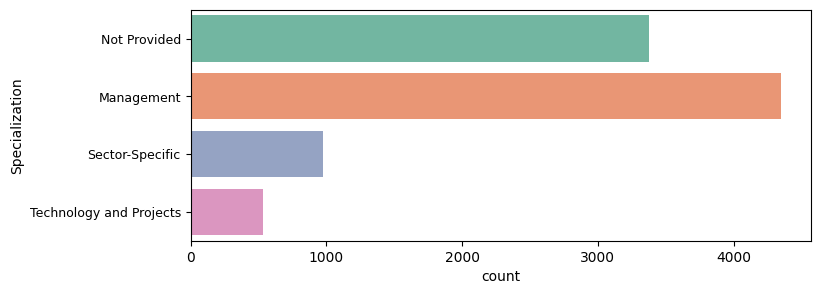

In [26]:
#lets visualize how skewed the data is
plt.figure(figsize= [8,3])
sns.countplot(lead_score['Specialization'], palette ="Set2")
plt.yticks(fontsize = 9)
plt.show()

-  A significant portion of the data indicates missing information, since 'Specialization' is a categorical column we can impute missing data with the most frequent i.e. the mode, in this case 'Management', however, imputing with the mode may result in that category becoming overly dominant, which can skew the data and affect the performance of the model. 

In [27]:
# Replace missing values in the 'What is your current occupation' column with 'Not Provided'
lead_score['What is your current occupation'].fillna('Not Provided', inplace=True)

In [28]:
# Check the value counts for the 'What is your current occupation' column
lead_score['What is your current occupation'].value_counts(normalize = True) *100

What is your current occupation
Unemployed              60.606061
Not Provided            29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: proportion, dtype: float64

In [29]:
# arrange few labels
lead_score['What is your current occupation'] = lead_score['What is your current occupation'].replace(['Businessman'], 'Working Professional')
lead_score['What is your current occupation'] = lead_score['What is your current occupation'].replace(['Housewife','Other'], 'Others')

In [30]:
lead_score['What is your current occupation'].value_counts(normalize = True) *100

What is your current occupation
Unemployed              60.606061
Not Provided            29.112554
Working Professional     7.727273
Student                  2.272727
Others                   0.281385
Name: proportion, dtype: float64

In [31]:
# Replace missing values in the 'What matters most to you in choosing a course' column with 'Not Provided'
lead_score['What matters most to you in choosing a course'].fillna('Not Provided', inplace=True)

In [32]:
# Check the value counts for the 'What matters most to you in choosing a course' column
lead_score['What matters most to you in choosing a course'].value_counts(normalize = True) *100

What matters most to you in choosing a course
Better Career Prospects      70.649351
Not Provided                 29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: proportion, dtype: float64

-  the 'What matters most to you in choosing a course' column is imbalanced, with the vast majority of entries falling under 'Better Career Prospects', other fields are either left with no data provided or very low count, so we drop this column. 

In [33]:
# Drop the 'What matters most to you in choosing a course' column
lead_score.drop(columns=['What matters most to you in choosing a course'], inplace=True)

In [34]:
# Replace missing values in the 'Tags' column with 'Not Provided'
lead_score['Tags'].fillna('Not Provided', inplace=True)

In [35]:
# Check the value counts for the 'Tags' column
lead_score['Tags'].value_counts(normalize = True) *100

Tags
Not Provided                                         36.287879
Will revert after reading the email                  22.424242
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                        

-  The 'Tags' column represents various statuses of leads, with a significant portion labeled as "Not Provided" (36.29%).
-  The 'Tags' column has many unique categories, some of which are redundant or overlap with others. For example, categories like 'Ringing', 'Busy', and 'switched off' all represent different stages of attempted contact, the tags may not provide useful predictive information and do not appear to add significant value for predictive modeling thus we drop it.

In [36]:
# Drop the 'Tags' column
lead_score.drop(columns=['Tags'], inplace=True)

In [37]:
# check missing values again
round(lead_score.isnull().mean() * 100 ,2).sort_values(ascending = False)

TotalVisits                                 1.48
Page Views Per Visit                        1.48
Last Activity                               1.11
Lead Source                                 0.39
Lead Origin                                 0.00
X Education Forums                          0.00
A free copy of Mastering The Interview      0.00
I agree to pay the amount through cheque    0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
Magazine                                    0.00
Newspaper Article                           0.00
Search                                      0.00
What is your current occupation             0.00
Specialization                              0.00
Total Time Spent on Website                 0.00
Converted           

-  The columns 'Lead Source', 'TotalVisits', 'Page Views Per Visit', and 'Last Activity' have small proportions of missing values which are less than 4-5% so here we drop the rows.

In [38]:
# drop rows with missing values less than 4-5%
lead_score = lead_score.dropna()

-  There are some columns in this dataset that have only one single value. 

In [39]:
# Check the unique value counts for the specified columns
print(lead_score['I agree to pay the amount through cheque'].value_counts())
print(lead_score['Update me on Supply Chain Content'].value_counts())
print(lead_score['Get updates on DM Content'].value_counts())
print(lead_score['Receive More Updates About Our Courses'].value_counts())

I agree to pay the amount through cheque
No    9074
Name: count, dtype: int64
Update me on Supply Chain Content
No    9074
Name: count, dtype: int64
Get updates on DM Content
No    9074
Name: count, dtype: int64
Receive More Updates About Our Courses
No    9074
Name: count, dtype: int64


-  Columns with only one unique value like 'No', might not contribute meaningful information that could help in predicting the target variable.

In [40]:
# drop columns with a single unique value
col_to_drop = ['I agree to pay the amount through cheque','Update me on Supply Chain Content','Get updates on DM Content','Receive More Updates About Our Courses']
lead_score.drop(columns=col_to_drop, inplace=True)

In [41]:
lead_score.shape

(9074, 20)

In [42]:
# check missing values
lead_score.isnull().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Do Not Call                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
Search                                    0
Magazine                                  0
Newspaper Article                         0
X Education Forums                        0
Newspaper                                 0
Digital Advertisement                     0
Through Recommendations                   0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [43]:
lead_score.head(3)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Not Provided,Unemployed,No,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Not Provided,Unemployed,No,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Management,Student,No,No,No,No,No,No,No,Yes,Email Opened


### Handling Outliers

In [44]:
lead_score.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.456028,482.887481,2.370151
std,0.485053,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
max,1.000000,251.000000,2272.000000,55.000000


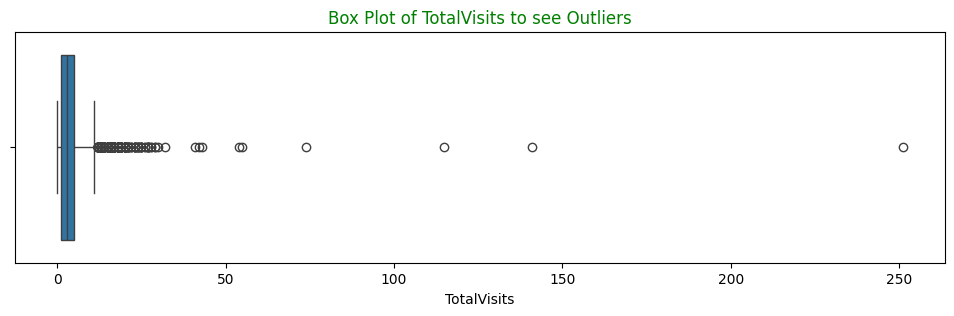

In [45]:
# checking outliers for TotalVisits 
plt.figure(figsize=[12,3])
sns.boxplot(x = lead_score.TotalVisits)
plt.title('Box Plot of TotalVisits to see Outliers', fontdict={'fontsize': 12, 'color' : 'Green'})
plt.show()

-  In the TotalVisits column, which indicates the total number of visits made by the customer to the website, the maximum value is 251 which seems abnormally high and likely represents erroneous data.

In [46]:
lead_score['TotalVisits'].quantile(0.99)

17.0

In [47]:
# check the dataset for values of TotalVisits above 20
lead_score[lead_score['TotalVisits'] > 20]

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
345,Landing Page Submission,Organic Search,No,No,1,21.0,1113,2.63,Email Opened,Management,Unemployed,No,No,No,No,No,No,No,Yes,Email Opened
469,Landing Page Submission,Organic Search,No,No,0,22.0,59,5.50,Page Visited on Website,Management,Unemployed,No,No,No,No,No,No,No,Yes,Page Visited on Website
663,Landing Page Submission,Google,No,No,1,21.0,1885,3.50,Email Opened,Management,Unemployed,No,No,No,No,No,No,No,Yes,Email Opened
1160,Landing Page Submission,Direct Traffic,No,No,0,43.0,57,3.91,Email Opened,Management,Unemployed,No,No,No,No,No,No,No,No,Email Opened
1741,Landing Page Submission,Direct Traffic,Yes,No,0,22.0,601,1.38,Page Visited on Website,Management,Unemployed,No,No,No,No,No,No,No,Yes,Page Visited on Website
1824,Landing Page Submission,Direct Traffic,No,No,0,30.0,68,10.00,SMS Sent,Management,Unemployed,No,No,No,No,No,No,No,Yes,Modified
2154,API,Olark Chat,No,No,1,23.0,1677,2.09,Olark Chat Conversation,Management,Unemployed,No,No,No,No,No,No,No,No,Olark Chat Conversation
2190,Landing Page Submission,Direct Traffic,Yes,No,0,55.0,297,55.00,Page Visited on Website,Technology and Projects,Unemployed,No,No,No,No,No,No,No,Yes,Modified
2289,Landing Page Submission,Google,No,No,1,21.0,1198,5.25,View in browser link Clicked,Management,Unemployed,No,No,No,No,No,No,No,Yes,Modified
2322,Landing Page Submission,Direct Traffic,Yes,No,0,141.0,755,6.71,Page Visited on Website,Management,Not Provided,No,No,No,No,No,No,No,Yes,Page Visited on Website


-  From the above analysis it seems that few of the leads who visited the website more than 20 times have been converted but the rest seem outliers and they can skew the distribution, leading to biased estimates, and potentially mislead the model, so we drop them.

In [48]:
# Filter the DataFrame to include only rows where TotalVisits is less than 30
lead_score = lead_score[lead_score['TotalVisits'] < 30]

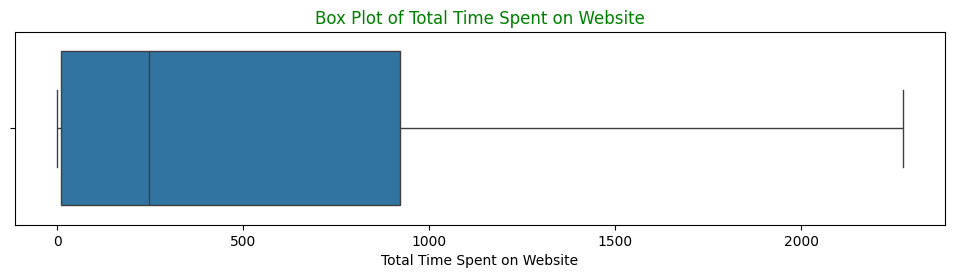

In [49]:
# checking outliers for Total Time Spent on Website 
plt.figure(figsize=[12,2.5])
sns.boxplot(x = lead_score['Total Time Spent on Website'])
plt.title('Box Plot of Total Time Spent on Website', fontdict={'fontsize': 12, 'color' : 'Green'})
plt.show()

- Since there are no outliers for 'Total Time Spent on Website', we dont need outlier treatment.

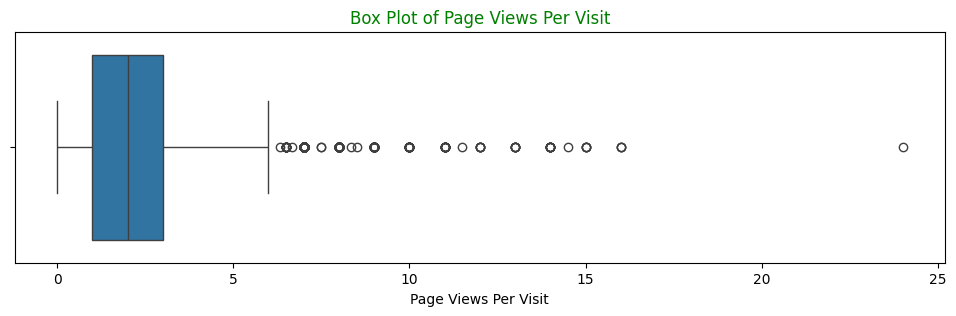

In [50]:
# checking outliers for Page Views Per Visit 
plt.figure(figsize=[12,3])
sns.boxplot(x = lead_score['Page Views Per Visit'])
plt.title('Box Plot of Page Views Per Visit', fontdict={'fontsize': 12, 'color' : 'Green'})
plt.show()

In [51]:
lead_score['Page Views Per Visit'].quantile(0.99)

9.0

In [52]:
# check the dataset for values of Page Views Per Visit above 15
lead_score[lead_score['Page Views Per Visit'] > 15]

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
125,API,Referral Sites,No,No,0,16.0,53,16.0,Olark Chat Conversation,Not Provided,Not Provided,No,No,No,No,No,No,No,No,Modified
5164,Landing Page Submission,Direct Traffic,Yes,No,0,16.0,103,16.0,Page Visited on Website,Management,Not Provided,No,No,No,No,No,No,No,Yes,Modified
5495,Landing Page Submission,Google,Yes,No,0,16.0,462,16.0,Page Visited on Website,Technology and Projects,Unemployed,No,No,No,No,No,No,No,Yes,Modified
6805,API,Organic Search,No,No,1,24.0,1527,24.0,Page Visited on Website,Not Provided,Not Provided,No,No,No,No,No,No,No,No,Modified


-  Above the 99th percentile there are many leads that have been converted, so removing those datapoints, might lead to unnecessary data loss, so we remove only the max datapoint to avoid inaccuracies.

In [53]:
# Filter the DataFrame to include only rows where Page Views Per Visit is less than or equal 16
lead_score = lead_score[lead_score['Page Views Per Visit'] <= 16]

In [54]:
# check size
lead_score.shape

(9062, 20)

In [55]:
# to get the number of unique values for each column
lead_score.nunique().sort_values()

Magazine                                     1
Through Recommendations                      2
Do Not Email                                 2
Do Not Call                                  2
Converted                                    2
Digital Advertisement                        2
Newspaper                                    2
X Education Forums                           2
Newspaper Article                            2
A free copy of Mastering The Interview       2
Search                                       2
Lead Origin                                  4
Specialization                               4
What is your current occupation              5
Last Notable Activity                       16
Last Activity                               17
Lead Source                                 21
TotalVisits                                 30
Page Views Per Visit                       106
Total Time Spent on Website               1716
dtype: int64

In [56]:
# Check the value counts for the columns with less that 4 unique values except target variable 'Converted'
columns_to_check = ['Magazine', 'Through Recommendations', 'Do Not Email', 'Do Not Call','Digital Advertisement', 
                    'X Education Forums', 'Newspaper Article', 'A free copy of Mastering The Interview', 'Search']

for column in columns_to_check:
    print(lead_score[column].value_counts())

Magazine
No    9062
Name: count, dtype: int64
Through Recommendations
No     9055
Yes       7
Name: count, dtype: int64
Do Not Email
No     8352
Yes     710
Name: count, dtype: int64
Do Not Call
No     9060
Yes       2
Name: count, dtype: int64
Digital Advertisement
No     9058
Yes       4
Name: count, dtype: int64
X Education Forums
No     9061
Yes       1
Name: count, dtype: int64
Newspaper Article
No     9060
Yes       2
Name: count, dtype: int64
A free copy of Mastering The Interview
No     6178
Yes    2884
Name: count, dtype: int64
Search
No     9048
Yes      14
Name: count, dtype: int64


-  Column 'Magazine' has only one unique value and this does not contribute to the model's ability to make predictions, so we drop it and for the rest do EDA and decide.

In [57]:
# drop column 'Magazine'
lead_score.drop(columns = ['Magazine'], inplace =True)

In [58]:
lead_score.head(2)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Not Provided,Unemployed,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Not Provided,Unemployed,No,No,No,No,No,No,No,Email Opened


In [59]:
# analyse the remaining categorical columns
print(lead_score['Lead Origin'].value_counts())
print(lead_score['Lead Source'].value_counts())
print(lead_score['Last Activity'].value_counts())
print(lead_score['Last Notable Activity'].value_counts())

Lead Origin
Landing Page Submission    4875
API                        3576
Lead Add Form               581
Lead Import                  30
Name: count, dtype: int64
Lead Source
Google               2867
Direct Traffic       2535
Olark Chat           1753
Organic Search       1153
Reference             443
Welingak Website      129
Referral Sites        123
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64
Last Activity
Email Opened                    3430
SMS Sent                        2714
Olark Chat Conversation          972
Page Visited on Website          632
Converted to Lead                428
Email Bounced                    312
Email Link Cli

-  'Lead Source' column indicates where the lead originated from, knowing the source of a lead can provide crucial insights into which channels are most effective at generating hot leads.
-  'Last Activity' column records the last interaction a lead had, understanding the last activity will help in planning the next step and can help predict the likelihood of conversion based on recent behavior.
-  'Last Notable Activity' column captures the last significant interaction, which might not always be the most recent activity, but since this column might be useful for training the mode, we will decide after checking for mmulticollinearity, whether to drop it.

In [60]:
# changing 'google' to 'Google' in the Lead Source column
lead_score['Lead Source'] = lead_score['Lead Source'].replace({'google': 'Google'})

In [61]:
# replace the labels having less data entry points with 'others'
lead_score['Lead Source'] = lead_score['Lead Source'].replace(['bing', 'Click2call', 'Press_Release','Social Media','Live Chat','youtubechannel','testone','Pay per Click Ads','welearnblog_Home','WeLearn','blog','NC_EDM'], 'Other Sources')

In [62]:
# replace the labels having less data entry points with 'others'
lead_score['Last Activity'] = lead_score['Last Activity'].replace(['View in browser link Clicked','Approached upfront','Email Received','Email Marked Spam','Visited Booth in Tradeshow','Resubscribed to emails'], 'Other Activities')

In [63]:
# replace the labels having less data entry points with 'others'
lead_score['Last Notable Activity'] = lead_score['Last Notable Activity'].replace(['Email Marked Spam','Approached upfront','Resubscribed to emails','View in browser link Clicked','Form Submitted on Website','Email Received'], 'Others')

In [64]:
lead_score.shape

(9062, 19)

# EDA

In [65]:
# check imbalance percentage
lead_score.Converted.value_counts(normalize  = True)  *100

Converted
0    62.116531
1    37.883469
Name: proportion, dtype: float64

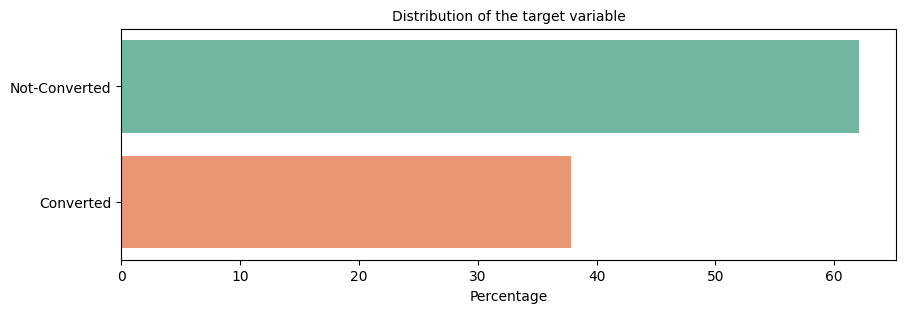

In [66]:
# Visualizing univariate characteristics of the Target variable
plt.figure(figsize= [10,3])
sns.barplot(y = ['Not-Converted','Converted'] ,  x = lead_score["Converted"].value_counts(normalize =True)*100, palette ="Set2")
plt.xlabel('Percentage')
plt.title("Distribution of the target variable", fontdict = {"fontsize":10})
plt.show()

### Univariate Analysis

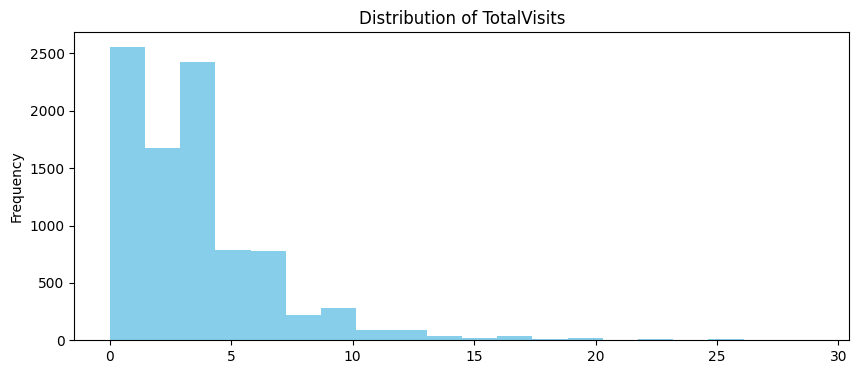

In [67]:
# to check distribution of TotalVisits
plt.figure(figsize = (10,4))
lead_score['TotalVisits'].plot(kind='hist',bins=20 , color = "skyblue")
plt.title('Distribution of TotalVisits')
plt.ylabel('Frequency')
plt.show()

-  The histogram shows a right-skewed distribution, max frequency distribution is accumulated for number of total visits between 0 to 5, the frequency of total visits decreases as the number of visits increases.

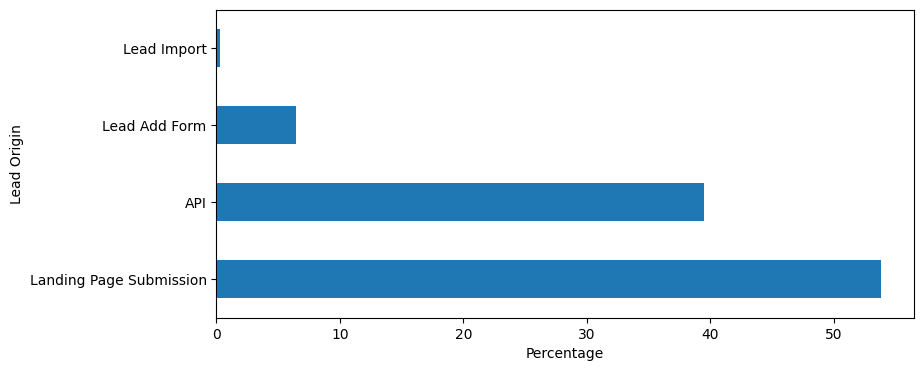

In [68]:
# percentage distribution of Lead Origin
plt.figure(figsize = (9,4))
(lead_score['Lead Origin'].value_counts(normalize = True)*100).plot.barh() 
plt.xlabel('Percentage')
plt.show()

-  The 'Lead Origin' variable seems to categorize the source or method through which customers have been identified to be a potential lead.
-  'Landing Page Submission' category has the highest percentage, indicating that most of the leads are identified through landing page submissions, almost more than 55 % of our dataset.
-  'API' category also has identified significant number of leads, 'Lead Import' has the lowest percentage to help identify leads.

### Segmented Univariate

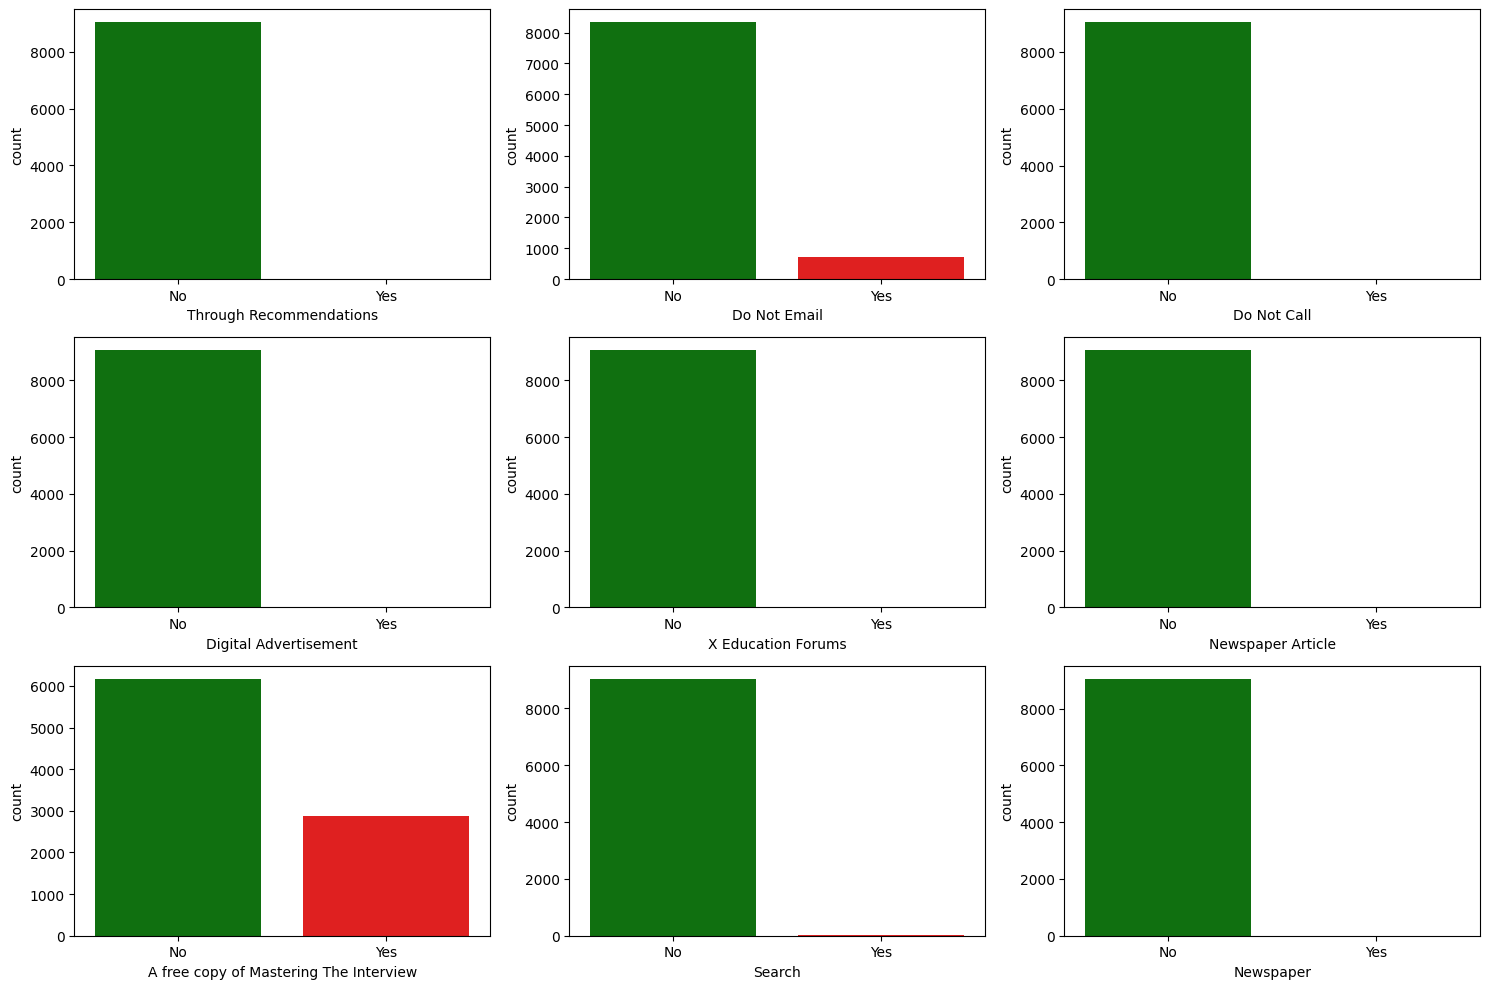

In [69]:
# Analyzing leads preferences and their response to advertisements
lead_preferences = ['Through Recommendations','Do Not Email','Do Not Call','Digital Advertisement','X Education Forums','Newspaper Article','A free copy of Mastering The Interview','Search','Newspaper']
fig, axes = plt.subplots(nrows = 3 , ncols = 3, figsize=(15, 10))
axes = axes.flatten()     # Flatten the axes array for easy iteration

# Iterate over columns to plot counts
for i, col in enumerate(lead_preferences):
    sns.countplot(x=col,data=lead_score, ax=axes[i] ,palette=["g", "r"] )
    
plt.tight_layout()    #prevent overlapping to make everything fit nicely
plt.show()

-  It appears that the majority of customers did not acknowledge seeing the advertisement across all the channels listed in the columns. This is indicated by the dominance of the green bars No over the red bars Yes in each plot.
-  The significant imbalance between Yes and No responses in these columns could potentially affect the performance of a predictive model.
-  To simplify our model we drop these columns except variable 'A free copy of Mastering The Interview' and 'Do Not Email'

In [70]:
# drop columns 'Through Recommendations','Do Not Call','Digital Advertisement','X Education Forums','Newspaper Article','Newspaper' and 'Search' 
lead_score.drop(columns = ['Through Recommendations','Do Not Call','Digital Advertisement','X Education Forums','Newspaper Article','Search','Newspaper'], inplace =True)

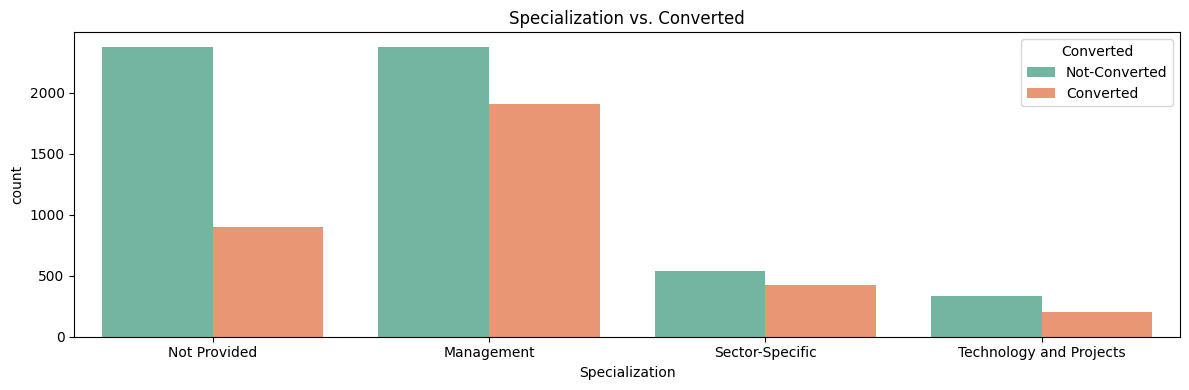

In [71]:
# Analyze how specialization categories influence conversion rates
plt.figure(figsize = [12,4])
sns.countplot(x='Specialization', hue='Converted', data=lead_score,  palette='Set2')
plt.title('Specialization vs. Converted')
plt.legend(title='Converted', labels=['Not-Converted', 'Converted'])
plt.tight_layout() 
plt.show()

-  'Management' category shows a highest converted leads, compared to rest of the specialization categories, it might also be due to combined similar specializations across different fields for that category.
-  Rest specializations in 'Sector-Specific', 'Technology and Projects' sort of have a relatively balanced distribution between converted and non-converted leads.
-  Many of the leads who have not specified any Specialization, that we can see under the 'Not Provided' category, the conversion rate for this category is higher for the non-converted ones, but still has a reasonable conversion rate.

### Bivariate Analysis

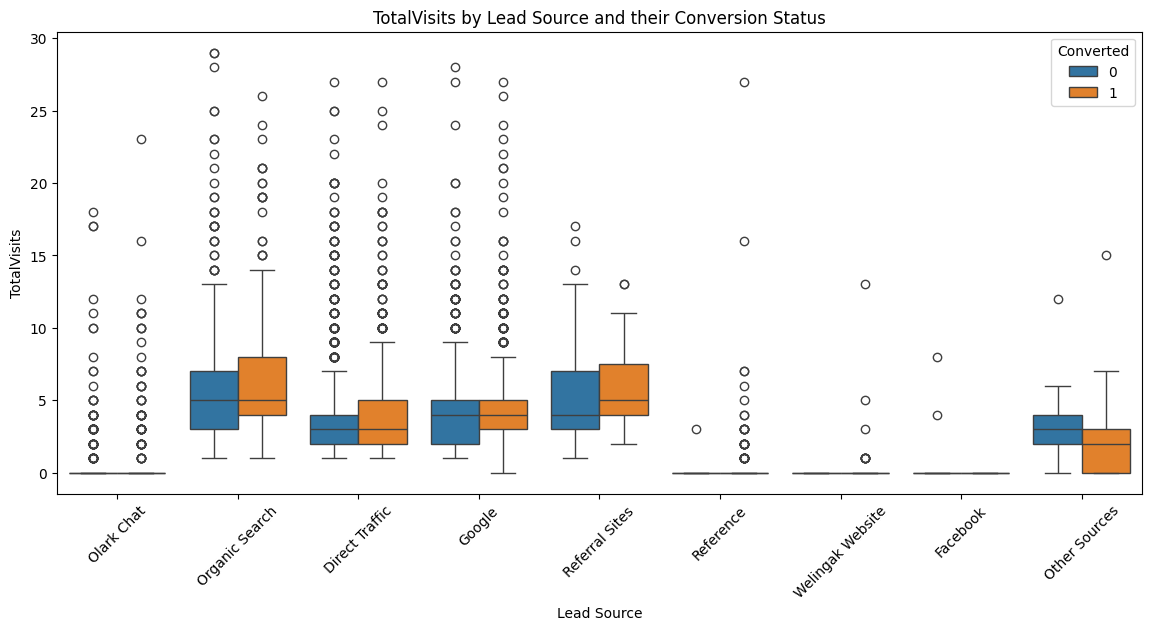

In [72]:
# relationship between the TotalVisits and the Lead Source
plt.figure(figsize=(14, 6))
sns.boxplot(x='Lead Source', y='TotalVisits', hue='Converted', data=lead_score)
plt.title('TotalVisits by Lead Source and their Conversion Status')
plt.xticks(rotation=45)
plt.show()

-  For 'Olark Chat', both converted and non-converted leads have a similar distribution of total visits.
-  Category 'Organic Search' converted leads have a almost similar median number of total visits compared to non-converted leads. 
-  For 'Direct Traffic' source and 'Google' source the medians seem to be almost same for number of visits. although 'Direct Traffic' source seem to have a higher max visits for converted leads.
-  For 'Referral Sites', Converted leads have a slightly higher median number of visits compared to non-converted leads.
-  For 'Reference' there are more visits form the Converted leads compared to the non-converted ones; and for 'Welingak Website' and 'Facebook' both converted and non-converted leads have very few visits, lastly 'Other Sources' have quite some visits with the median of non-converted leads being higher than converted.

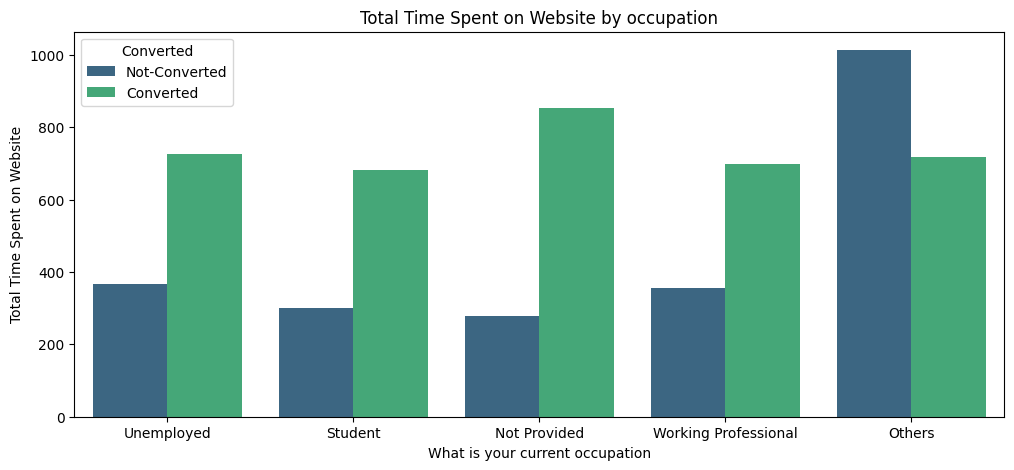

In [73]:
# the distribution of total time spent on the website across different occupations
plt.figure(figsize = [12,5])
sns.barplot(x='What is your current occupation', y='Total Time Spent on Website', hue='Converted', data=lead_score, palette='viridis', ci=None)
plt.title('Total Time Spent on Website by occupation')
plt.legend(title='Converted', labels=['Not-Converted', 'Converted'])
plt.show()

-  Except 'Others' category, almost all types of occupation field , those who have been converted to lead, have spent almost equal amount of time on the website, which is almost more than 700 minutes; and the ones who did not get converted have spent less time comparared to the converted ones. 

### Multivariate

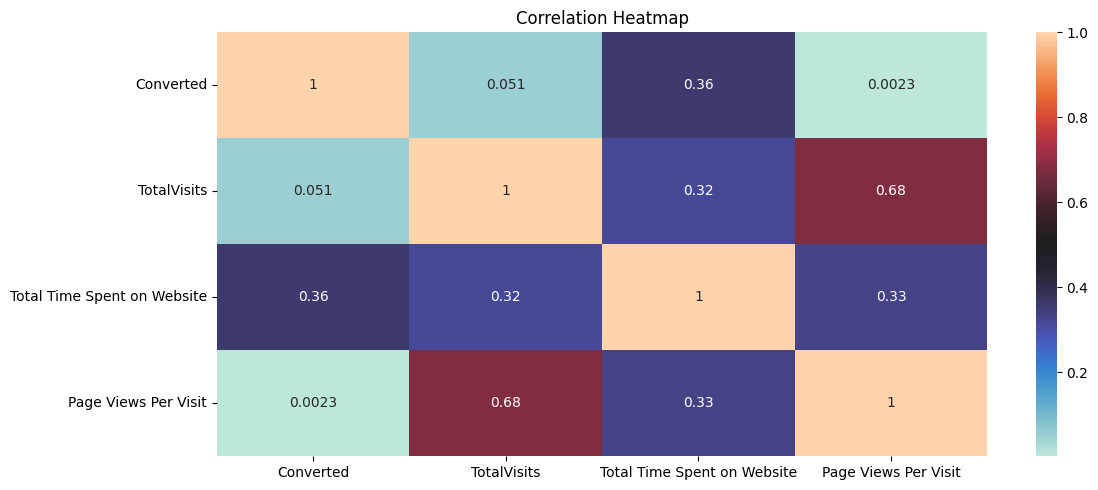

In [74]:
# correlation between few of the numerical variables w.r.t target variable
num_variables = ['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

plt.figure(figsize=(12, 5))
sns.heatmap(lead_score[num_variables].corr(), annot=True, cmap='icefire')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

-  There is a weak positive correlation between TotalVisits and conversion rate.
-  Total Time Spent on Website has a relatively moderate positive correlation (0.31) with Converted, might suggests that customers who spend more time on the website are more likely to convert.
-  Page Views Per Visit has a very weak positive correlation (0.002) with the target variable, so it doesn't seem to have much influence on the conversion leads.

In [75]:
lead_score.shape

(9062, 12)

### Data Preparation for Model Building

In [76]:
lead_score.dtypes

Lead Origin                                object
Lead Source                                object
Do Not Email                               object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
What is your current occupation            object
A free copy of Mastering The Interview     object
Last Notable Activity                      object
dtype: object

-  We have 8 categorical variables for which we have to create dummy variables, and in some of the variables we must drop the category specifying 'Not Provided', 'Others' or with lenghty labels etc. to make them as reference categories.

In [77]:
# create dummy variables for 'Lead Origin' and drop_first which becomes our reference category
d1 = pd.get_dummies(lead_score['Lead Origin'], prefix = 'Lead_Origin', drop_first=True, dtype= 'int')

# concatenate with the original dataframe
lead_score = pd.concat([lead_score,d1], axis = 1)

In [78]:
# create dummy variables for 'Lead Source'
d2 = pd.get_dummies(lead_score['Lead Source'], prefix = 'Lead_Source', dtype= 'int')

# dropping level Other Sources, now this category becomes the reference category.
dv2 = d2.drop(['Lead_Source_Other Sources'], axis = 1)

# concatenate with the original dataframe
lead_score = pd.concat([lead_score,dv2], axis = 1)

In [79]:
# create dummy variables for 'Last Activity'
d3 = pd.get_dummies(lead_score['Last Activity'], prefix = 'Last_Activity', dtype= 'int')

# dropping level Other Activities now this category becomes the reference category.
dv3 = d3.drop(['Last_Activity_Other Activities'], axis = 1)

# concatenate with the original dataframe
lead_score = pd.concat([lead_score,dv3], axis = 1)

In [80]:
# create dummy variables for 'Last Notable Activity'
d4 = pd.get_dummies(lead_score['Last Notable Activity'], prefix='Last Notable Activity', drop_first=True, dtype= 'int')

# concatenate with the original dataframe
lead_score = pd.concat([lead_score,d4], axis = 1)

In [81]:
# create dummy variables for 'Specialization'
d5 = pd.get_dummies(lead_score['Specialization'], prefix = 'Specialization', dtype= 'int')

# dropping level with 'Not Provided' and now this category becomes the reference category
dv5 = d5.drop(['Specialization_Not Provided'], axis = 1)

# concatenate with the original dataframe
lead_score = pd.concat([lead_score,dv5], axis = 1)

In [82]:
# create dummy variables for 'What is your current occupation'
d6 = pd.get_dummies(lead_score['What is your current occupation'], prefix = 'What is your current occupation', dtype= 'int')

# dropping level with 'Others' and now this category becomes the reference category.
dv6 = d6.drop(['What is your current occupation_Others'], axis = 1)

# concatenate with the original dataframe
lead_score = pd.concat([lead_score,dv6], axis = 1)

In [83]:
# create dummy variables for 'Do Not Email'
d7 = pd.get_dummies(lead_score['Do Not Email'], prefix='Do Not Email', drop_first=True, dtype= 'int')

# concatenate with the original dataframe
lead_score = pd.concat([lead_score,d7], axis = 1)

In [84]:
# create dummy variables for 'A free copy of Mastering The Interview'
d8 = pd.get_dummies(lead_score['A free copy of Mastering The Interview'], prefix='A free copy of Mastering The Interview', drop_first=True, dtype= 'int')

# concatenate with the original dataframe
lead_score = pd.concat([lead_score,d8], axis = 1)

In [85]:
lead_score.drop(columns =['Lead Origin','Lead Source','Last Activity','Last Notable Activity','Specialization','What is your current occupation','Do Not Email','A free copy of Mastering The Interview'], inplace=True)

In [86]:
lead_score.shape

(9062, 45)

# Model Building

### Test-Train Split

In [87]:
# remove the non-predicting features and the target variable
X = lead_score.drop(['Converted'], axis =1)

X.head(3)

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Direct Traffic,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Welingak Website,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Had a Phone Conversation,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Specialization_Management,Specialization_Sector-Specific,Specialization_Technology and Projects,What is your current occupation_Not Provided,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Do Not Email_Yes,A free copy of Mastering The Interview_Yes
0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1


In [88]:
# storing the target vriable in y
y = lead_score['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [89]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3 , random_state = 100)

In [90]:
# check shape and size
print(X_train.shape)
print(X_test.shape)

(6343, 44)
(2719, 44)


### Feature Scaling

In [91]:
# Instantiate the StandardScaler
scaler = StandardScaler()

# Apply scaler() to all the columns except the binary ones and 'dummy' variables, scaling ensures they contribute equally to the model
X_train[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit' ]] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit' ]])

-  fit_transform() is used on training data, so the scaler learns the parameters needed for scaling and then the scaler applies the learned parameters to transform the data i.e. it fits the data.

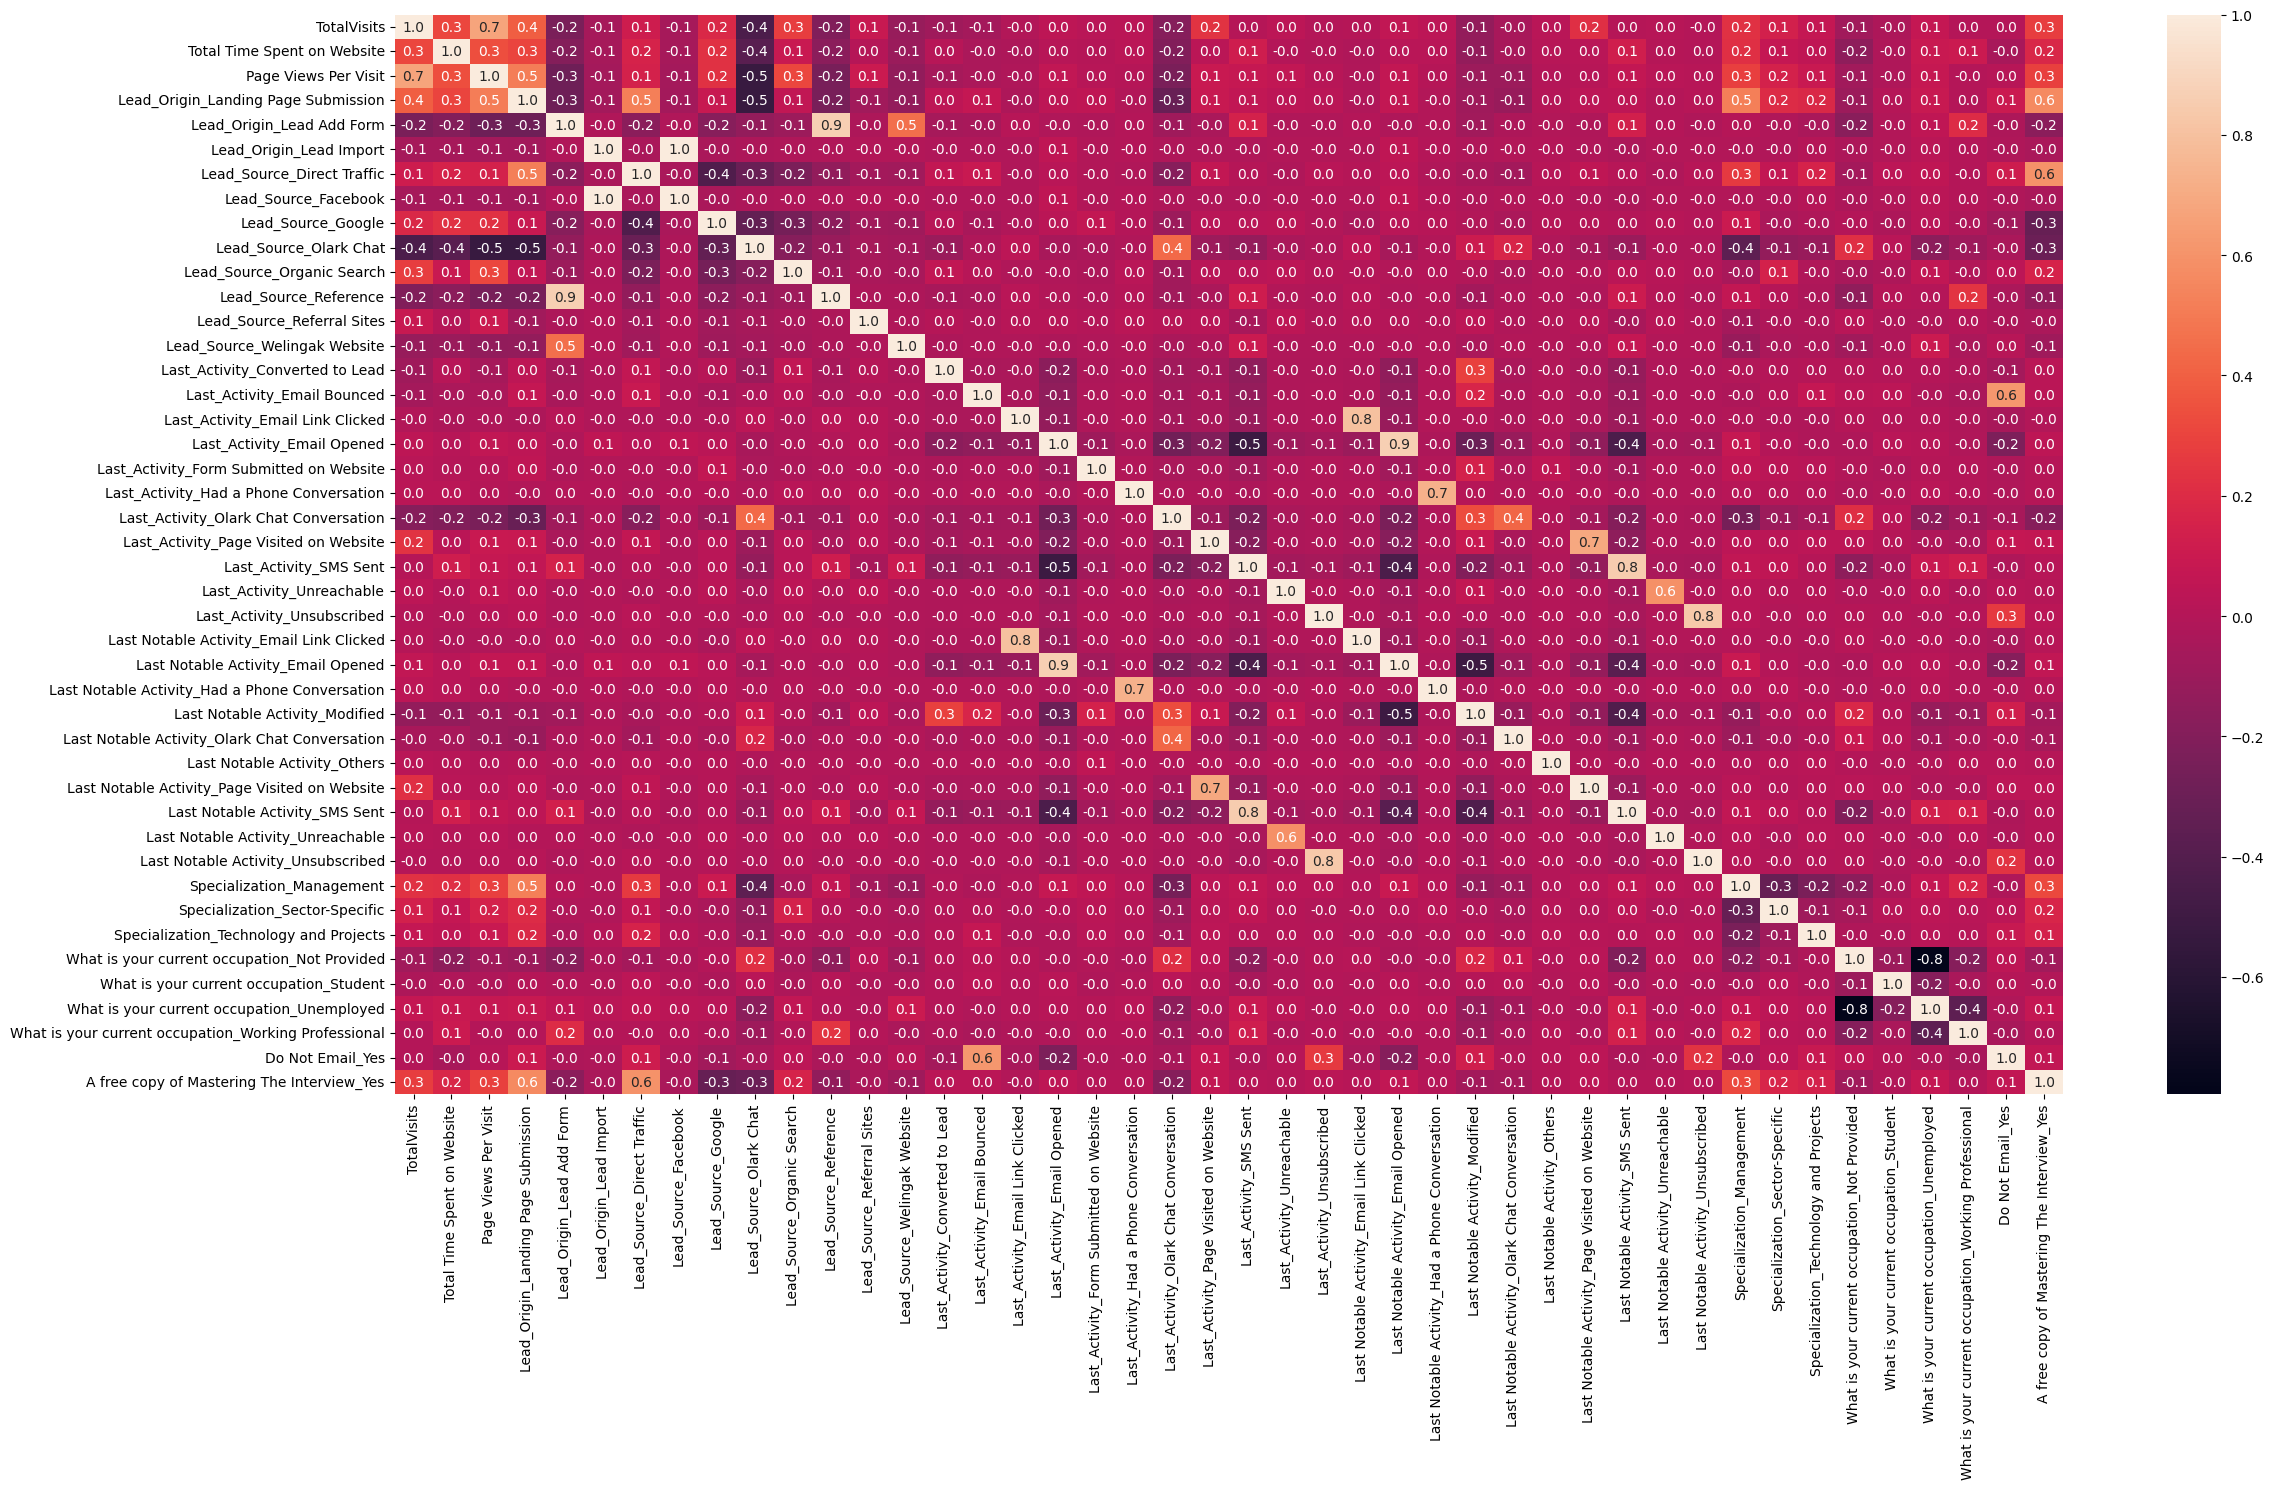

In [92]:
plt.figure(figsize=(25, 15))

# Generate heatmap 
sns.heatmap(X_train.corr(), annot=True, fmt=".1f")

# Adjust layout
plt.tight_layout()
plt.show()

-  With too many variables to analyse and remove highly correlated features manually, we'll use Recursive Feature Elimination (RFE) to automatically select the most relevant features for our model.

In [93]:
# check shape and size of training data set
print(X_train.shape)
print(X_test.shape)

(6343, 44)
(2719, 44)


In [94]:
# check shape and size of test data set
print(y_train.shape)
print(y_test.shape)

(6343,)
(2719,)


In [95]:
# building logistic regression model
logm1 = sm.GLM(y_train , (sm.add_constant(X_train)), family = sm.families.Binomial()) #GLM allows for more flexible, non-linear relationships
                                                                                      #Use of Binomial family, since our target variable is a binary with two outcomes
# fit the model
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6343
Model:                            GLM   Df Residuals:                     6299
Model Family:                Binomial   Df Model:                           43
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2463.2
Date:                Tue, 18 Jun 2024   Deviance:                       4926.4
Time:                        16:05:00   Pearson chi2:                 6.37e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4244
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    3.4455      1.467      2.349      0.019       0.570       6.321
TotalVisits                                              0.1925      0.050      3.830      0.000       0.094       0.291
Total Time Spent on Website                              1.1018      0.042     26.298      0.000       1.020       1.184
Page Views Per Visit                                    -0.1976      0.056     -3.508      0.000      -0.308      -0.087
Lead_Origin_Landing Page Submission                     -0.6916      0.140     -4.950      0.000      -0.965      -0.418
Lead_Origin_Lead Add Form                               22.0436   1.81e+04      0.001      0.999   -3.54e+04    3.54e+04
Lead_Origin_Lead Import                                  0.0276      0.416      0.066      0.947      -0.788       0.843
Lead_Source_Direct Traffic                              -0.8299      0.690     -1.202      0.229      -2.183       0.523
Lead_Source_Facebook                                     0.0276      0.416      0.066      0.947      -0.788       0.843
Lead_Source_Google                                      -0.5506      0.687     -0.802      0.423      -1.896       0.795
Lead_Source_Olark Chat                                   0.4955      0.695      0.713      0.476      -0.867       1.858
Lead_Source_Organic Search                              -0.8146      0.695     -1.172      0.241      -2.176       0.547
Lead_Source_Reference                                  -19.5425   1.81e+04     -0.001      0.999   -3.54e+04    3.54e+04
Lead_Source_Referral Sites                              -0.8453      0.781     -1.082      0.279      -2.376       0.686
Lead_Source_Welingak Website                           -17.2692   1.81e+04     -0.001      0.999   -3.54e+04    3.54e+04
Last_Activity_Converted to Lead                         -1.6913      0.838     -2.017      0.044      -3.335      -0.048
Last_Activity_Email Bounced                             -1.6673      0.962     -1.734      0.083      -3.552       0.218
Last_Activity_Email Link Clicked                        -0.9942      0.894     -1.112      0.266      -2.746       0.757
Last_Activity_Email Opened                              -0.6263      0.822     -0.762      0.446      -2.238       0.985
Last_Activity_Form Submitted on Website                 -1.5208      0.877     -1.734      0.083      -3.240       0.199
Last_Activity_Had a Phone Conversation                  -0.1151      1.296     -0.089      0.929      -2.655       2.425
Last_Activity_Olark Chat Conversation                   -2.0518      0.834     -2.461      0.014      -3.686      -0.418
Last_Activity_Page Visited on Website                   -1

-  Some variables with p-values less than 0.05 are TotalVisits, Total Time Spent on Website, Specialization_Management and many more showing they might have significant impact on conversion, while many others have very high p-value, they may not significantly influence the conversion rate.
-  Many of them have a high negative coefficient such as 'A free copy of Mastering The Interview', 'Last_Activity_Olark Chat Conversation', 'Lead_Source_Welingak Website', etc. these suggests that as the predictor variable increases, the log odds of the response variable decrease, basically having lower likelihood of converting to lead.

### Feature selection using RFE

In [96]:
# instantiate the logistic regression model
logreg = LogisticRegression()

# instantiate RFE 
rfe = RFE(estimator=logreg, n_features_to_select=15)     # selecting 15 features
rfe = rfe.fit(X_train, y_train)                          # fit the RFE model to the training data

In [97]:
rfe.support_   #check which columns are selected

array([False,  True, False, False,  True, False,  True, False,  True,
       False,  True, False,  True,  True, False, False, False, False,
       False,  True,  True, False,  True, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
       False, False,  True, False, False,  True,  True, False])

In [98]:
# list column names with their selection status and ranking provided by RFE
list(zip(X_train.columns, rfe.support_ , rfe.ranking_ ))

[('TotalVisits', False, 25),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 24),
 ('Lead_Origin_Landing Page Submission', False, 8),
 ('Lead_Origin_Lead Add Form', True, 1),
 ('Lead_Origin_Lead Import', False, 27),
 ('Lead_Source_Direct Traffic', True, 1),
 ('Lead_Source_Facebook', False, 28),
 ('Lead_Source_Google', True, 1),
 ('Lead_Source_Olark Chat', False, 12),
 ('Lead_Source_Organic Search', True, 1),
 ('Lead_Source_Reference', False, 19),
 ('Lead_Source_Referral Sites', True, 1),
 ('Lead_Source_Welingak Website', True, 1),
 ('Last_Activity_Converted to Lead', False, 16),
 ('Last_Activity_Email Bounced', False, 17),
 ('Last_Activity_Email Link Clicked', False, 29),
 ('Last_Activity_Email Opened', False, 10),
 ('Last_Activity_Form Submitted on Website', False, 18),
 ('Last_Activity_Had a Phone Conversation', True, 1),
 ('Last_Activity_Olark Chat Conversation', True, 1),
 ('Last_Activity_Page Visited on Website', False, 21),
 ('Last_Activity_SMS Sent', 

In [99]:
# display names of columns that are selected
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead_Origin_Lead Add Form',
       'Lead_Source_Direct Traffic', 'Lead_Source_Google',
       'Lead_Source_Organic Search', 'Lead_Source_Referral Sites',
       'Lead_Source_Welingak Website',
       'Last_Activity_Had a Phone Conversation',
       'Last_Activity_Olark Chat Conversation', 'Last_Activity_SMS Sent',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable',
       'What is your current occupation_Not Provided',
       'What is your current occupation_Working Professional',
       'Do Not Email_Yes'],
      dtype='object')

In [100]:
# display names of columns which are not selected
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead_Origin_Landing Page Submission', 'Lead_Origin_Lead Import',
       'Lead_Source_Facebook', 'Lead_Source_Olark Chat',
       'Lead_Source_Reference', 'Last_Activity_Converted to Lead',
       'Last_Activity_Email Bounced', 'Last_Activity_Email Link Clicked',
       'Last_Activity_Email Opened', 'Last_Activity_Form Submitted on Website',
       'Last_Activity_Page Visited on Website', 'Last_Activity_Unreachable',
       'Last_Activity_Unsubscribed',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Others',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unsubscribed',
       'Specialization_Management', 'Specialization_Sector-Specific',
       'Specialization_Technology and Projects',
       'Wh

In [101]:
# build model on selected columns

# add constant to include intercept
X_train_sm =sm.add_constant(X_train[col])

# build model
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

# fit model
res = logm2.fit()
res.summary()  # check model summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6343
Model:                            GLM   Df Residuals:                     6327
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2570.6
Date:                Tue, 18 Jun 2024   Deviance:                       5141.2
Time:                        16:05:04   Pearson chi2:                 6.51e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4046
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2413      0.096      2.511      0.012       0.053       0.430
Total Time Spent on Website                              1.1240      0.041     27.627      0.000       1.044       1.204
Lead_Origin_Lead Add Form                                2.3415      0.237      9.884      0.000       1.877       2.806
Lead_Source_Direct Traffic                              -1.6174      0.118    -13.678      0.000      -1.849      -1.386
Lead_Source_Google                                      -1.2206      0.113    -10.822      0.000      -1.442      -1.000
Lead_Source_Organic Search                              -1.5247      0.137    -11.146      0.000      -1.793      -1.257
Lead_Source_Referral Sites                              -1.7313      0.374     -4.630      0.000      -2.464      -0.998
Lead_Source_Welingak Website                             1.7627      0.755      2.335      0.020       0.283       3.242
Last_Activity_Had a Phone Conversation                   0.5551      1.014      0.547      0.584      -1.432       2.542
Last_Activity_Olark Chat Conversation                   -1.3552      0.168     -8.054      0.000      -1.685      -1.025
Last_Activity_SMS Sent                                   1.3344      0.075     17.694      0.000       1.187       1.482
Last Notable Activity_Had a Phone Conversation           2.4990      1.578      1.584      0.113      -0.594       5.592
Last Notable Activity_Unreachable                        1.8396      0.501      3.672      0.000       0.858       2.822
What is your current occupation_Not Provided            -1.3428      0.089    -15.020      0.000      -1.518      -1.168
What is your current occupation_Working Professional     2.4144      0.179     13.509      0.000       2.064       2.765
Do Not Email_Yes                                        -1.4269      0.171     -8.345      0.000      -1.762      -1.092
========================================================================================================================
"""

-  Last Notable Activity_Had a Phone Conversation and Last_Activity_Had a Phone Conversation have p-value greater than 0.05, let us also check VIF values.

In [102]:
# calculate VIF for the model
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range (X_train[col].shape[1])]  
                                                                                # to iterate over the range number of columns 
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
7,Last_Activity_Had a Phone Conversation,2.18
10,Last Notable Activity_Had a Phone Conversation,2.17
1,Lead_Origin_Lead Add Form,1.53
9,Last_Activity_SMS Sent,1.47
12,What is your current occupation_Not Provided,1.45
3,Lead_Source_Google,1.39
2,Lead_Source_Direct Traffic,1.33
6,Lead_Source_Welingak Website,1.32
0,Total Time Spent on Website,1.24
13,What is your current occupation_Working Profes...,1.19


In [103]:
# drop column Last Notable Activity_Had a Phone Conversation
col = col.drop('Last Notable Activity_Had a Phone Conversation')

In [104]:
# Fit the logistic regression model again with the updated set of features
X_train_sm =sm.add_constant(X_train[col])

# build model
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

# fit model
res = logm3.fit()
res.summary()  # check model summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6343
Model:                            GLM   Df Residuals:                     6328
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2571.9
Date:                Tue, 18 Jun 2024   Deviance:                       5143.8
Time:                        16:05:04   Pearson chi2:                 6.50e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4043
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2398      0.096      2.496      0.013       0.051       0.428
Total Time Spent on Website                              1.1226      0.041     27.612      0.000       1.043       1.202
Lead_Origin_Lead Add Form                                2.3385      0.237      9.871      0.000       1.874       2.803
Lead_Source_Direct Traffic                              -1.6144      0.118    -13.661      0.000      -1.846      -1.383
Lead_Source_Google                                      -1.2165      0.113    -10.795      0.000      -1.437      -0.996
Lead_Source_Organic Search                              -1.5287      0.137    -11.174      0.000      -1.797      -1.261
Lead_Source_Referral Sites                              -1.7487      0.377     -4.641      0.000      -2.487      -1.010
Lead_Source_Welingak Website                             1.7661      0.755      2.339      0.019       0.286       3.246
Last_Activity_Had a Phone Conversation                   1.8129      0.782      2.319      0.020       0.281       3.345
Last_Activity_Olark Chat Conversation                   -1.3548      0.168     -8.054      0.000      -1.685      -1.025
Last_Activity_SMS Sent                                   1.3339      0.075     17.694      0.000       1.186       1.482
Last Notable Activity_Unreachable                        1.8396      0.501      3.672      0.000       0.858       2.821
What is your current occupation_Not Provided            -1.3407      0.089    -15.005      0.000      -1.516      -1.166
What is your current occupation_Working Professional     2.4127      0.179     13.497      0.000       2.062       2.763
Do Not Email_Yes                                        -1.4265      0.171     -8.345      0.000      -1.762      -1.092
========================================================================================================================
"""

In [105]:
# calculate VIF for the model
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range (X_train[col].shape[1])]  
                                                                                # to iterate over the range number of columns 
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
1,Lead_Origin_Lead Add Form,1.53
9,Last_Activity_SMS Sent,1.47
11,What is your current occupation_Not Provided,1.45
3,Lead_Source_Google,1.39
2,Lead_Source_Direct Traffic,1.33
6,Lead_Source_Welingak Website,1.32
0,Total Time Spent on Website,1.24
12,What is your current occupation_Working Profes...,1.19
8,Last_Activity_Olark Chat Conversation,1.18
4,Lead_Source_Organic Search,1.14


-  All variables have VIF value below 5 and p-value below 0.05, thus no issues of multicollinearity observed, thus we can proceed with prediction.

### Model prediction on fitted model

In [106]:
# predict values and check probability
y_train_pred = res.predict(X_train_sm)  # predict method to generate predictions i.e. probabilities on the fitted model

In [107]:
# display first 10 elements
y_train_pred[:10]

3114    0.296220
6838    0.148214
8263    0.111723
1307    0.715434
2492    0.384494
2253    0.167775
8413    0.900402
2201    0.030687
6788    0.451245
1612    0.914195
dtype: float64

In [108]:
# reshape
y_train_pred = y_train_pred.values.reshape(-1) # convert numpy array to 1D array
y_train_pred[:10]

array([0.29621962, 0.14821374, 0.11172291, 0.71543359, 0.38449438,
       0.16777498, 0.90040223, 0.03068673, 0.45124455, 0.91419527])

In [109]:
# create DataFrame
y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Converted_prob': y_train_pred})

In [110]:
# add new column to the dataframe and show index number
y_train_pred_final['Index_ID'] = y_train.index  # to identify each prediction with its resp. observation

In [111]:
# display first 10 
y_train_pred_final.head(10)

,Converted,Converted_prob,Index_ID
0,0,0.296220,3114
1,0,0.148214,6838
2,0,0.111723,8263
3,1,0.715434,1307
4,1,0.384494,2492
5,0,0.167775,2253
6,1,0.900402,8413
7,0,0.030687,2201
8,0,0.451245,6788
9,1,0.914195,1612


In [112]:
# create a new column and put a randomt threshold value to classify
y_train_pred_final['Conversion_pred'] = y_train_pred_final['Converted_prob'].map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Index_ID,Conversion_pred
0,0,0.296220,3114,0
1,0,0.148214,6838,0
2,0,0.111723,8263,0
3,1,0.715434,1307,1
4,1,0.384494,2492,0


In [113]:
# show confusion matrix to display misclassification i.e to capture errors
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Conversion_pred'])
print(confusion)

[[3489  438]
 [ 719 1697]]


-  TP: 1697 is the number of observations where converted leads are actually predicted as converted
-  FN: 719 is the number of observations where the leads actually converted but model predicted as not converted
-  TN: 3489 is the number of observations where the model correctly predicted not converted as not converted
-  FP: 438 is the number of observations where the leads did not convert but model predicted them as converted

In [114]:
# check accuracy score to see percentage of correctly predicted labels
print(metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['Conversion_pred']))

0.8175941983288665


-  Accuracy score will not be sufficient as we can see the confusion matrix, the ones predicted wrong are left out from the accuracy metrics, thus we need other evaluation metrics

# Model Evaluation

In [115]:
# define true positive/negative and false positive/negative
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [116]:
# calculate Sensitivity
print('Sensitivity:', TP/float(TP+FN))

Sensitivity: 0.7024006622516556


In [117]:
#calculate Specificity
print('Specificity:', TN/float(TN+FP))

Specificity: 0.8884644766997708


In [118]:
# calculate positive predictie value
print('Positive predictie value:', TP/float(TP+FP))

Positive predictie value: 0.794847775175644


In [119]:
# calculate negative predictive value
print('Negative predictive value:', TN/float(TN+FN))

Negative predictive value: 0.8291349809885932


In [120]:
# calculate false positive rate
print('FPR:', FP/float(TN+FP))   # it needs to be a low value since this is 1-Specificity

FPR: 0.11153552330022919


In [121]:
# plot ROC curve to show tradeoff between TPR and FPR
def draw_roc(actual, prob):
    fpr,tpr,thresholds = metrics.roc_curve(actual, prob, drop_intermediate = False) # drop_intermediate =False so it returns thresholds even where TPR and FPR have same values
    auc_score = metrics.roc_auc_score(actual,prob) # area under the curve
    
    plt.figure(figsize = [5,5])
    plt.plot(fpr,tpr,label = 'ROC Curve (area = %0.2f)'%auc_score)
    plt.plot([0,1],[0,1],'k--')            # plot random classifier for reference
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate/ [1 - Specificity]')
    plt.ylabel('True Positive Rate/ Sensitivity')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc = "lower right")
    plt.show()
    
    return None

In [122]:
# calculate FPR, TPR and thresholds using actual converted values and predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_prob'], 
                                         drop_intermediate = False)

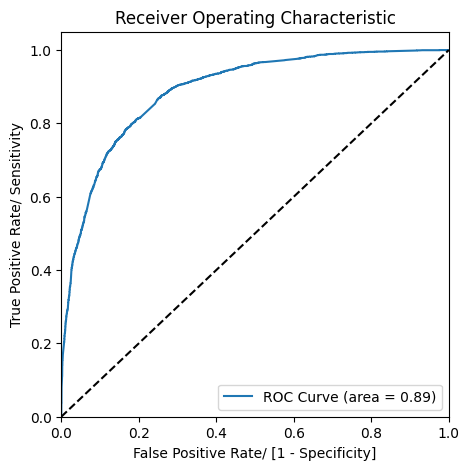

In [123]:
# call the function
draw_roc(y_train_pred_final['Converted'], y_train_pred_final['Converted_prob'])

-  From the ROC curve above we can see that the curve is more towards the upper-left corner of the graph and away from the 45 degree diagonal line which is the random classifier, this shows that our model is good.
-  Since before we selected a random threshold value, we will now try to find the Optimal threshold point.

### Finding the Optimal Threshold

In [124]:
# create list of different probability cut-offs/thresholds points
numbers = [float(x)/10 for x in range(10)] 

for i in numbers:                                  # iterate through each probability cutoff 
    y_train_pred_final[i] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x>i else 0)
    
y_train_pred_final.head()

,Converted,Converted_prob,Index_ID,Conversion_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.296220,3114,0,1,1,1,0,0,0,0,0,0,0
1,0,0.148214,6838,0,1,1,0,0,0,0,0,0,0,0
2,0,0.111723,8263,0,1,1,0,0,0,0,0,0,0,0
3,1,0.715434,1307,1,1,1,1,1,1,1,1,1,0,0
4,1,0.384494,2492,0,1,1,1,1,0,0,0,0,0,0


In [125]:
# create empty Dataframe for columns cutoff values, accuracy, sensitivity and specificity
cutoff_df = pd.DataFrame(columns = ['Prob_cutoffs', 'accuracy', 'sensitivity', 'specificity'])

In [126]:
# calculate accuracy, sensitivity and specificity for the different cutoff points
num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for i in num:
    cm_1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])  # compare actual converted values with predicted converted values at ith cutoff
    total_1 = sum(sum(cm_1))                                                         # total sum of (sum of row1, sum of row2)
    accuracy = (cm_1[0,0] + cm_1[1,1])/ total_1
    sensitivity = cm_1[1,1]/(cm_1[1,0] + cm_1[1,1])
    specificity =cm_1[0,0] / (cm_1[0,0] + cm_1[0,1])
    cutoff_df.loc[i] = [i, accuracy, sensitivity, specificity]
    
print(cutoff_df)

     Prob_cutoffs  accuracy  sensitivity  specificity
0.0           0.0  0.380892     1.000000     0.000000
0.1           0.1  0.600820     0.981374     0.366692
0.2           0.2  0.761627     0.913079     0.668449
0.3           0.3  0.792685     0.875414     0.741788
0.4           0.4  0.813968     0.769040     0.841609
0.5           0.5  0.817594     0.702401     0.888464
0.6           0.6  0.807820     0.634106     0.914693
0.7           0.7  0.781649     0.513659     0.946524
0.8           0.8  0.764622     0.433361     0.968424
0.9           0.9  0.714804     0.272765     0.986758


-  At lower thresholds the sensitivity is good but specificity is low, but at higher thersholds from 0.6, the specificity is increasing but the sensitivity is decreasing, let us visualize

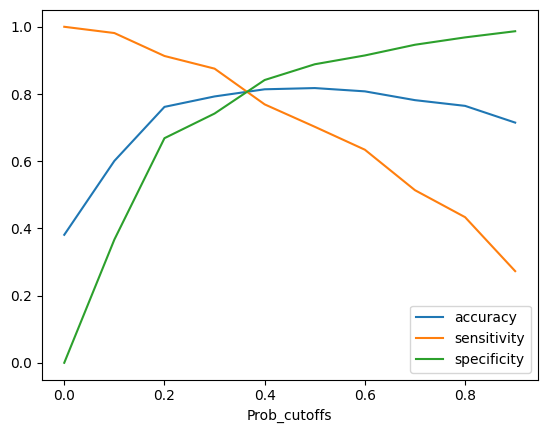

In [127]:
# plot the metrics against above probability cutoffs
cutoff_df.plot.line(x = 'Prob_cutoffs', y = ['accuracy', 'sensitivity', 'specificity'])
plt.show()

-  The intersection seems approximately between 0.3 and 0.4, but close to 0.4, so let us consider 0.37, this point will balance all sensitivity and specificity and accuracy.

In [128]:
# predict at 0.37 threshold value
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.37 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Index_ID,Conversion_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.296220,3114,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.148214,6838,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.111723,8263,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.715434,1307,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.384494,2492,0,1,1,1,1,0,0,0,0,0,0,1


In [129]:
# check accuracy score
print(metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['final_predicted']))

0.8117609963739555


In [130]:
# show confusion matrix to display misclassification
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
print(confusion)

[[3241  686]
 [ 508 1908]]


In [131]:
# define true positive/negative and false positive/negative
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [132]:
# calculate Sensitivity
print('Sensitivity:', TP/float(TP+FN))

Sensitivity: 0.7897350993377483


In [133]:
#calculate Specificity
print('Specificity:', TN/float(TN+FP))

Specificity: 0.8253119429590018


In [134]:
# calculate positive predictie value
print('Positive predictie value:', TP/float(TP+FP))

Positive predictie value: 0.7355435620663069


In [135]:
# calculate negative predictive value
print('Negative predictive value:', TN/float(TN+FN))

Negative predictive value: 0.8644971992531342


In [136]:
# calculate false positive rate
print('FPR:', FP/float(TN+FP))   

FPR: 0.1746880570409982


### Precision and Recall

In [137]:
# calculate Precision
print('Precision:', confusion[1,1]/(confusion[0,1] + confusion[1,1]))  # TP/(TP+FP)

Precision: 0.7355435620663069


In [138]:
# calculate Recall
print('Recall:', confusion[1,1]/(confusion[1,0] + confusion[1,1]))  # TP/(TP+FN)

Recall: 0.7897350993377483


-  Get Precision score and Recall score, from sklearn library to evaluate the model's performance

In [139]:
# Precision indicates the accuracy of the positive predictions
precision_score(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])

0.7355435620663069

In [140]:
# Recall measures how many of the actual positive cases were correctly predicted
recall_score(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])

0.7897350993377483

In [141]:
# display few entries of the actual and predicted conversion
y_train_pred_final['Converted'].head(10), y_train_pred_final['final_predicted'].head(10)

(0    0
 1    0
 2    0
 3    1
 4    1
 5    0
 6    1
 7    0
 8    0
 9    1
 Name: Converted, dtype: int64,
 0    0
 1    0
 2    0
 3    1
 4    1
 5    0
 6    1
 7    0
 8    1
 9    1
 Name: final_predicted, dtype: int64)

In [142]:
# calculate trade-off between precision and recall for different threshold values
p,r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_prob'])

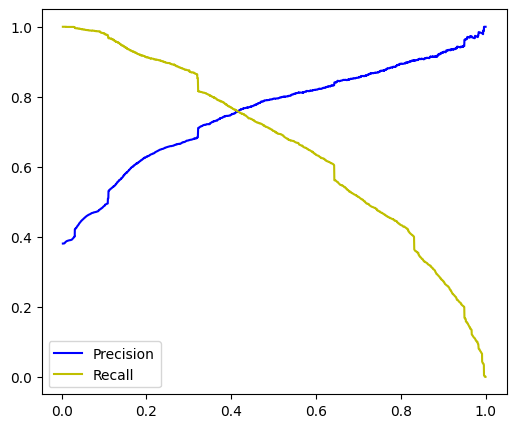

In [143]:
# plot precision and recall curve and exclude last threshold value i.e. 1
plt.figure(figsize=(6, 5))
plt.plot(thresholds, p[:-1], "b-", label='Precision')
plt.plot(thresholds, r[:-1], "y-", label='Recall')
plt.legend()
plt.show()

-  We can see threshold value little above 0.4, there is a balance between the precision and recall, so we use cutoff as 0.42

### Prediction on Test set

In [144]:
# Scale the test data set and only transform
X_test[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit' ]] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit' ]])

In [145]:
# match columns
X_test = X_test[col]

In [146]:
X_test.head()

,Total Time Spent on Website,Lead_Origin_Lead Add Form,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Organic Search,Lead_Source_Referral Sites,Lead_Source_Welingak Website,Last_Activity_Had a Phone Conversation,Last_Activity_Olark Chat Conversation,Last_Activity_SMS Sent,Last Notable Activity_Unreachable,What is your current occupation_Not Provided,What is your current occupation_Working Professional,Do Not Email_Yes
2803,-0.433912,0,0,1,0,0,0,0,0,0,0,0,0,0
5125,-0.662648,0,1,0,0,0,0,0,0,0,0,1,0,0
3981,-0.807208,0,1,0,0,0,0,0,0,0,0,0,0,0
4569,-0.880404,1,0,0,0,0,0,0,0,1,0,0,0,0
5289,-0.827337,0,1,0,0,0,0,0,0,0,0,0,0,1


In [147]:
# add constant
X_test_sm = sm.add_constant(X_test)

In [148]:
# apply the earlier trained model to the test dataset and predict on the test dataset 
y_test_pred = res.predict(X_test_sm)

In [149]:
# display first 10
y_test_pred[:10]

2803    0.187880
5125    0.030497
3981    0.092731
4569    0.949017
5289    0.023433
8780    0.028391
3733    0.068827
6566    0.157793
6228    0.214710
4062    0.996492
dtype: float64

In [150]:
# convert to DataFrame
y_pred_df = pd.DataFrame(y_test_pred)  # contains the predicted probabilities
y_pred_df[:10]

,0
2803,0.187880
5125,0.030497
3981,0.092731
4569,0.949017
5289,0.023433
8780,0.028391
3733,0.068827
6566,0.157793
6228,0.214710
4062,0.996492


In [151]:
# convert test into DataFrame
y_test_df = pd.DataFrame(y_test)            # contains the converted labels from our dataset
y_test_df['Index_ID'] = y_test_df.index

In [152]:
# reset index 
y_pred_df.reset_index(drop= True, inplace =True)
y_test_df.reset_index(drop= True, inplace =True)

In [153]:
# append above test and predicted df
y_pred_final= pd.concat([y_test_df, y_pred_df], axis =1)
y_pred_final.head()

,Converted,Index_ID,0
0,1,2803,0.187880
1,0,5125,0.030497
2,1,3981,0.092731
3,1,4569,0.949017
4,0,5289,0.023433


In [154]:
# rename the column title
y_pred_final = y_pred_final.rename(columns = {0 : 'Converted_prob'})

# rearrange the columns
y_pred_final = y_pred_final.reindex(['Index_ID','Converted','Converted_prob'], axis = 1)
y_pred_final.head()

,Index_ID,Converted,Converted_prob
0,2803,1,0.187880
1,5125,0,0.030497
2,3981,1,0.092731
3,4569,1,0.949017
4,5289,0,0.023433


In [155]:
# create new column and cutoff at 0.42 
y_pred_final['predicted_conversion'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.42 else 0)

y_pred_final.head()

,Index_ID,Converted,Converted_prob,predicted_conversion
0,2803,1,0.187880,0
1,5125,0,0.030497,0
2,3981,1,0.092731,0
3,4569,1,0.949017,1
4,5289,0,0.023433,0


In [156]:
# check accuracy score
print('Accuracy score:', metrics.accuracy_score(y_pred_final['Converted'], y_pred_final['predicted_conversion']))

Accuracy score: 0.8028687017285767


In [157]:
# show confusion matrix to display misclassification
confusion = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['predicted_conversion'])
print(confusion)

[[1446  256]
 [ 280  737]]


In [158]:
# define true positive/negative and false positive/negative
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [159]:
# calculate Sensitivity
print('Sensitivity:', TP/float(TP+FN))

Sensitivity: 0.7246804326450345


In [160]:
#calculate Specificity
print('Specificity:', TN/float(TN+FP))

Specificity: 0.8495887191539365


In [161]:
# calculate positive predictie value
print('Positive predictie value:', TP/float(TP+FP))

Positive predictie value: 0.7421953675730111


In [162]:
# calculate negative predictive value
print('Negative predictive value:', TN/float(TN+FN))

Negative predictive value: 0.8377752027809965


In [163]:
# calculate false positive rate
print('FPR:', FP/float(TN+FP))   

FPR: 0.15041128084606345


In [164]:
# calculate Precision
print('Precision:', TP/(TP+FP)) 

Precision: 0.7421953675730111


In [165]:
# calculate Recall
print('Recall:', TP/(TP+FN)) 

Recall: 0.7246804326450345


In [166]:
# add new column for lead scores
y_pred_final['Lead_score'] = round(y_pred_final['Converted_prob'] * 100, 2)

y_pred_final.head()

,Index_ID,Converted,Converted_prob,predicted_conversion,Lead_score
0,2803,1,0.187880,0,18.79
1,5125,0,0.030497,0,3.05
2,3981,1,0.092731,0,9.27
3,4569,1,0.949017,1,94.90
4,5289,0,0.023433,0,2.34


# Model Summary

The metrics score we obtained on the train dataset are:
-  Accuracy: 81.17%
-  Sensitivity: 78.97%
-  Specificity: 82.53%
-  Precision: 73.55%

The metrics score we obtained on the test dataset are:
-  Accuracy: 80.28%
-  Sensitivity: 72.46%
-  Specificity: 84.95%
-  Precision: 74.21% (If we want to increase precision we can increase the threshold value)

Lead scores above 42 should be identified as 'Hot Leads', and the model is 80.28% accurate in its predictions overall.